# Parking Meters

## Introduction

I chose the Parking Meters of each neighborhood as my metric because I believe that having easy access to park your prefered method of motorized transportation is an important factor in determining the best neighborhood to live in Pittsburgh. A higher number of active parking meters will allow more on the road parking, which is important if you choose to live in a building without parking. Additionally, parking meters often times allow for less traffic on roads. 

### Part One

In this section, I imported all of my necessary libraries required throughout my metric analysis. Then i input the CSV file and converted it to a DataFrame for easier data accessibility. I also renamed the column names and I replaced the mis-spelled neighborhood names.

In [20]:
import pandas as pd
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas
import csv
import seaborn as sns


parkingmeter_csv = pd.read_csv("ParkingMetersPittsburghParkingAuthority.csv")
data = pd.DataFrame(parkingmeter_csv)
data = data.rename(columns = {'node': 'Neighborhood','terminal_2': 'Status', 'rates': 'Price'})
data = data.replace({'Lawrenceville':'Central Lawrenceville', 'ShadySide' : 'Shadyside', 'Squirell Hill' : 'Squirrel Hill North',
                                   'Oakland' : 'Central Oakland', 'South Side' : 'South Side Slopes', 'NorthSide': 'Troy Hill','Mt. Washingt*': 'Mount Washington', 'Strip Distri*' : 'Strip District', 'Oakland' : 'North Oakland'})
data = data.filter(['Neighborhood','Status', 'Price'])


### Part Two

In this section, I calculated the Frequency of parking meters in each neighborhood. Then after removing the duplicate rows, I sorted the values by Frequency from Greates to Least. Then I printed the top 15 results.

In [21]:
data['Frequency'] = data.groupby('Neighborhood')['Neighborhood'].transform('count')  
data = data.drop_duplicates('Neighborhood')
data = data.sort_values(by = ['Frequency'], ascending = False)


data.head(10)

,Neighborhood,Status,Price,Frequency
28,North Oakland,Active,$3.00,216
35,South Side Slopes,Active,$1.00,109
57,Downtown,Active,$4.00,104
53,Troy Hill,Active,$1.00,84
10,Squirrel Hill North,Active,$1.50,69
23,Shadyside,Active,$1.50,66
30,Bloomfield,Active,$1.00,61
152,Uptown,Active,$1.50,60
0,East Liberty,Active,$1.50,59
207,Strip District,Active,$1.50,50


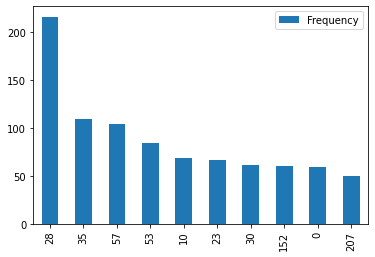

In [23]:
data.head(10).plot(kind = 'bar')


### Part Three

Here, I create a map using the entirety of the csv file, but some neighborhoods did not have any data to be graphed. The map is useful to visualize in which neighborhoods most of the active parking meters are available. I used geopandas to read the map file into the notebook.

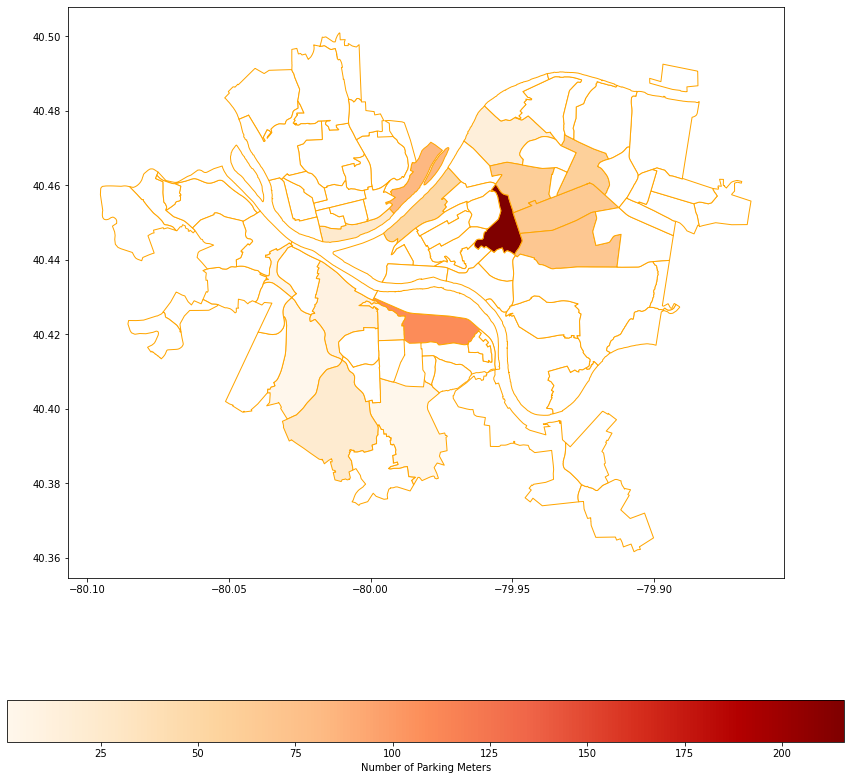

In [5]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
meter_map = neighborhoods.merge(data, how='left', left_on='hood', right_on='Neighborhood')
meter_map.plot(column = 'Frequency', cmap = 'OrRd', edgecolor = "orange", legend = True, 
                    legend_kwds = {'label': "Number of Parking Meters", 'orientation': "horizontal" }, figsize = (15,15), missing_kwds = {"color": "white"})


# Conclusion

As you can see, there is a fairly large disparity between the number of parking meters availible across the top 5 neighborhoods. According to the data I used, North Oakland is the best neighborhood for my metric. There are 216 active parking meters in North Oakland. However, I think it could be argued that any of the top 10 neighborhoods are good for parking meters, because they range from 50 to 100 active meters. North Oakland has a lot more, as it has many public hospital buildings with UPMC and public institution buildings with the University of Pittsburgh.  